In [98]:
# General Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# SK Learn Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Other Libraries
from astropy.table import Table
from astropy.io import ascii
from collections import Counter
from collections import OrderedDict

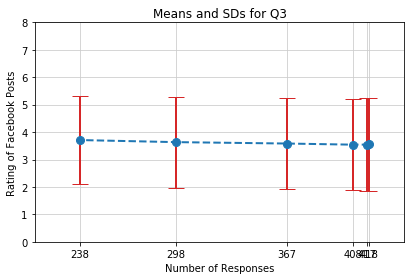

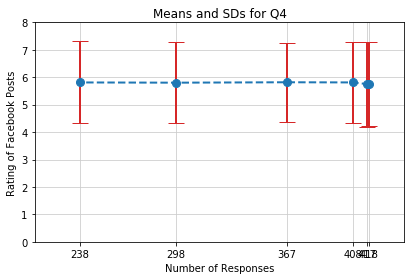

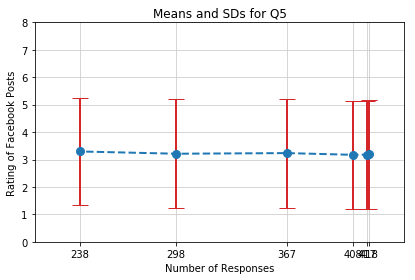

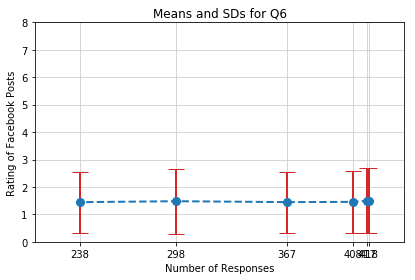

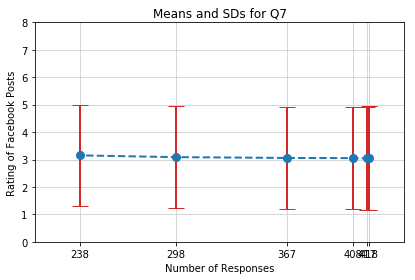

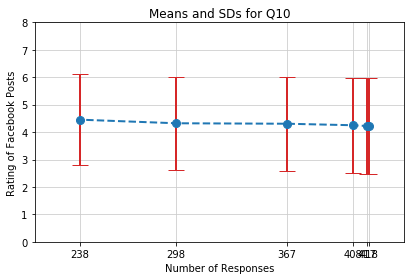

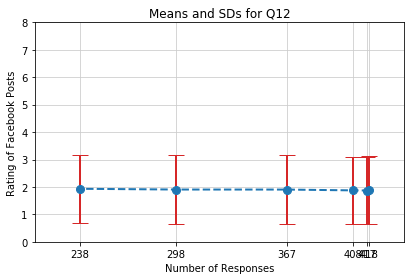

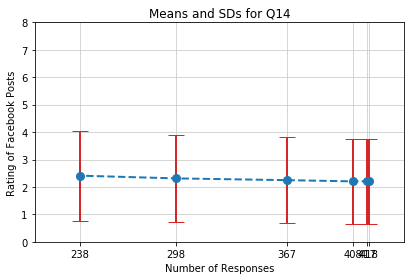

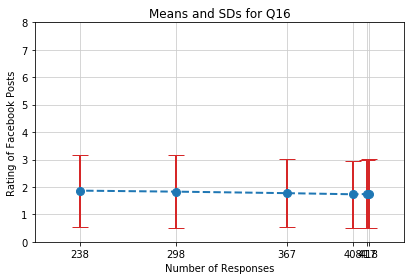

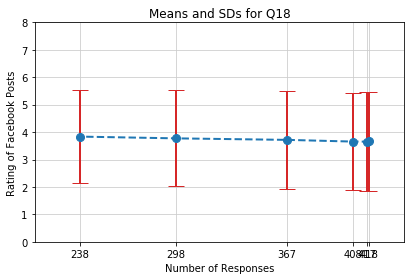

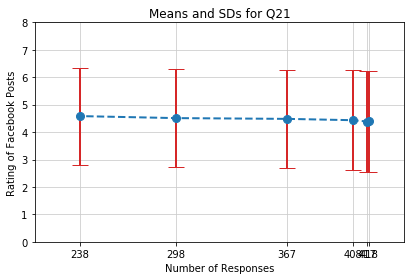

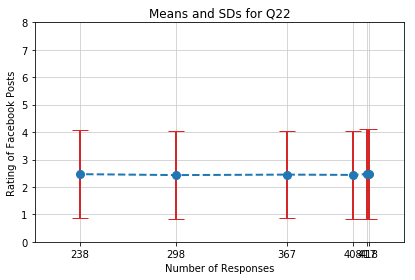

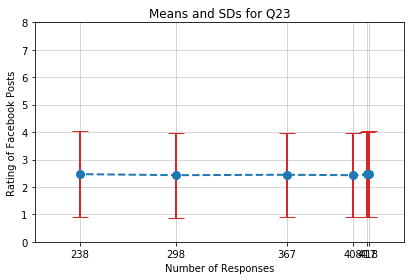

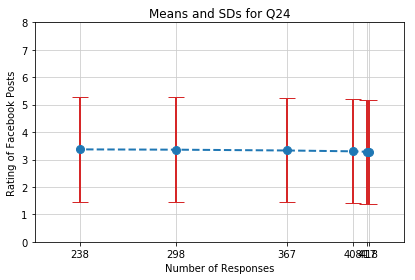

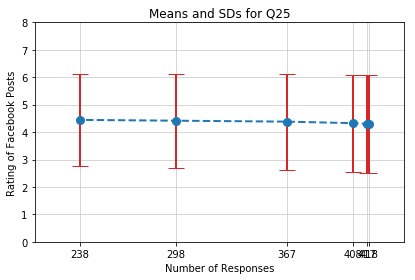

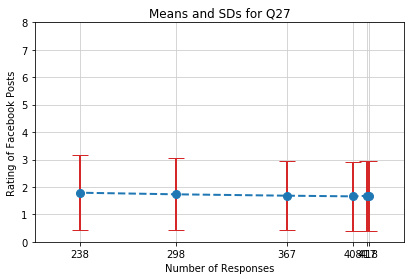

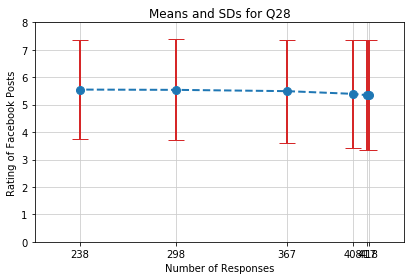

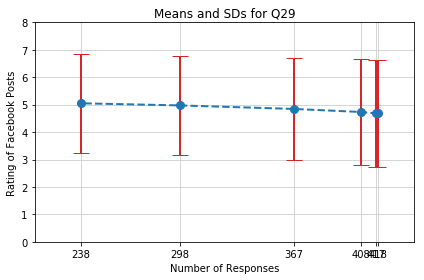

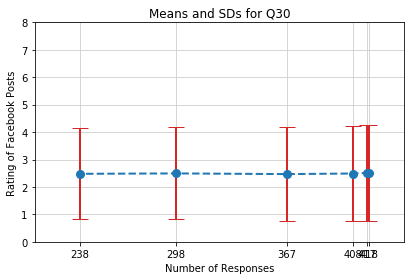

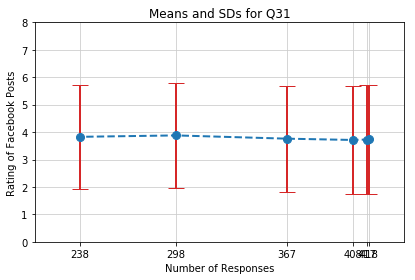

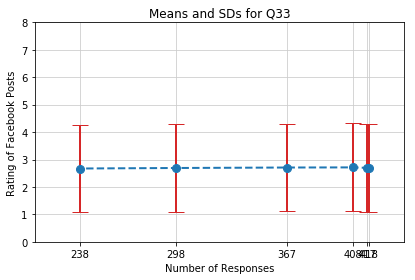

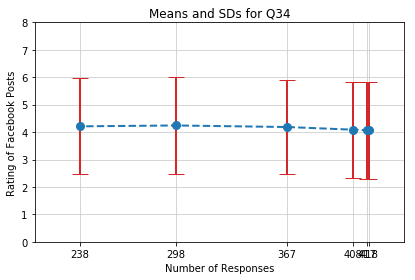

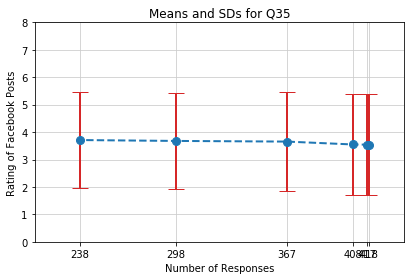

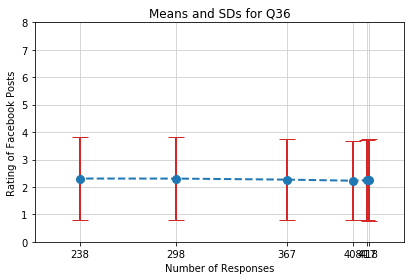

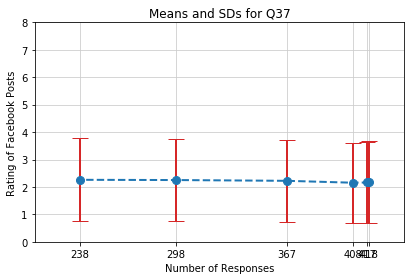

In [99]:
# Get indices to create dataframe of means/sds
df = pd.read_csv("Tables/table_of_all_means_sds.csv", delimiter=",") 
index = df['index']

# Create empty dataframe
dropped_times = ['', '_dropped_100', '_dropped_200', '_dropped_300', '_dropped_400', '_dropped_500']

response_numbers = [418, 417, 408, 367, 298, 238]

def plot_figs(means, sds, question_num):
    # fig = plt.figure(figsize=(5,4))
    plt.errorbar(response_numbers, means, yerr=sds, 
                 fmt="o--", markersize=8, linewidth=2, color='tab:blue', ecolor='tab:red', elinewidth=2, capsize=8);
    plt.ylabel('Rating of Facebook Posts')
    plt.xlabel('Number of Responses')
    plt.xticks(response_numbers)
    plt.title('Means and SDs for %s' % question_num)
    plt.tight_layout()
    plt.axis([210,440,0,8])
    plt.grid(True, ls="-", color='0.8')
    plt.savefig('Figures_by_Q/%s_means_sds_by_question.png' % question_num, overwrite=True)
    plt.show()
    
    
# Iterate through all questions:
for j in range(len(index)):
    means = []
    sds = []
    # Iterate through the stats for each question at diff time intervals
    for i in dropped_times:
        data = pd.read_csv("Tables%s/table_of_all_means_sds%s.csv" % (i, i), delimiter=",")
        means.append(data['means'][j])
        sds.append(data['sds'][j])
    plot_figs(means, sds, index[j])
    
    
    
